# Project: Analyze A/B Test Results 


## Table of Contents:

- [Introduction](#intro)
- [Questions](#Quest)
- [Part I - Data Wrangling & Probability](#wrang&prob)
- [Part II - Exploratory Data Analysis(EDA) & Probability](#EDA&prob)
- [Part III - A/B Test](#ab_test)
- [Part IV - Regression](#regression)
- [Conclusions](#Concl)




<a id='intro'></a>
## Introduction

#### For this project, we will be working to understand the results of an A/B test run by an e-commerce website. we goal is to work through this notebook to help the company understand if they should:

<a id='Quest'></a>
## Questions
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



#### - First of all, let's import the basic and necessary libraries .

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
random.seed(42)

<a id='wrang&prob'></a>
## Part I - Data Wrangling & Probability

#### We will do the following steps:

- Gathering data from the dataset and investigate it in an effort to understand more details about it.
- Performing a data assessment to identify any issues with data types, structure, or quality.
- Performing data cleaning by changing data types, replacing values, removing unnecessary data, and modifying the dataset for easier and faster analysis.





- ### Gathering Data

**A.** Reading in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### #Below is a description of this data set 

#### 
<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


- ### Assessing Data

**B.** Check the basic information of the data frame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


&#9865; **From the results of the information, it appears that all columns do not contain any nulls, and the data type of each column corresponds to it**.<br><br>

**C.** Let's check again if any of the rows contain missing or null values?

In [4]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

&#9865; **There are no missing or null values in any of the five columns.**<br><br>

**D.** Let's find out the number of rows in the data set.

In [5]:
print("number of rows: {}".format(df.shape[0]))

number of rows: 294478


**E.** Let's find out the number of unique users in the data set.

In [6]:
print("number of unique users: {}".format(df['user_id'].nunique()))

number of unique users: 290584


&#9865; **It is clear that we have "3894" more duplicate users than unique users.**

&#9865; **We will handle this later, but  first let's check out some other things.**<br><br>

**F.** The proportion of users converted.

In [7]:
df['converted'].mean()

0.11965919355605512



**G.** The proportion of users not converted.

In [8]:
1-df['converted'].mean()

0.8803408064439449

### 
&#9865; In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


&#9865; It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

&#9865; **So we will make sure that the two columns have no rows matching, as follows:**


**H.** Show rows in the control group that do not match the old page.

In [9]:
(df.loc[df['group']=='control'].loc[df['landing_page'] != 'old_page'])

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


&#9865; **There are 1,928 rows for the control group that do not match the old page.**<br><br>

**I.** Show rows in the treatment group that do not match the new page.

In [10]:
(df.loc[df['group']=='treatment'].loc[df['landing_page'] != 'new_page'])

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


&#9865; **There are 1,965 rows for the treatment group that do not match the new page.**<br><br>

**J.**Total number of non-identical rows for both groups

In [11]:
wrong_treatment= (df.loc[df['group']=='treatment'].loc[df['landing_page'] != 'new_page']).shape[0]
wrong_control= (df.loc[df['group']=='control'].loc[df['landing_page'] != 'old_page']).shape[0]

wrong_treatment + wrong_control

3893

- ### Data cleaning<br><br>
- For rows where the control group does not match the old page, and the treatment group does not match the new page, we can't be sure if these rows actually received the new or old web page, so we will drop these rows as follows:


**K.**  Let's first take a copy of the original df dataset.

In [12]:
df2= df.copy()

**L.** Now let's remove the mismatched rows by dropping them

In [13]:
df2.drop((df2.loc[df['group']=='treatment'].loc[df2['landing_page'] != 'new_page']).index, axis=0, inplace= True)
df2.drop((df2.loc[df['group']=='control'].loc[df2['landing_page'] != 'old_page']).index, axis=0, inplace= True)

**M.** Now let's do a reset of the index again, and then view the new dataset to see what it looks like after this cleaning.

In [14]:
df2= df2.reset_index(drop= True)

df2.head(50)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


**N.** Let's check again, are there still rows that don't match the new dataset df2?

In [15]:
wrong_control2= (df2.loc[df2['group']=='control'].loc[df2['landing_page'] != 'old_page']).shape[0]
wrong_treatment2= (df2.loc[df2['group']=='treatment'].loc[df2['landing_page'] != 'new_page']).shape[0]

print("The number of rows in the control group that do not match the old page is: {}".format(wrong_control2),
      "\nThe number of rows in the treatment group that do not match the new page is: {}".format(wrong_treatment2))

The number of rows in the control group that do not match the old page is: 0 
The number of rows in the treatment group that do not match the new page is: 0


**O.** Now let's review the total number of rows and the number of unique users in the df2 dataset after its cleaning.

In [16]:
print("number of rows: {}".format(df2.shape[0]))
print("number of unique users: {}".format(df2['user_id'].nunique()))

number of rows: 290585
number of unique users: 290584


&#9865; **It looks like there is still one row of duplicates for user_id**<br><br>

**P.** First let's check if there is already a duplicate **user_id**.

In [17]:
df2['user_id'].duplicated().any()

True

**Q.** Let's find out what this duplicate **user_id** is?

In [18]:
df2[df2['user_id'].duplicated()]['user_id']

2862    773192
Name: user_id, dtype: int64

**R.** Let's display the rows for the duplicate **user_id**? 

In [19]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**S.** Let's now remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [20]:
# Remove one of the rows with a duplicate user_id..
df2.drop_duplicates('user_id', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2['user_id'].duplicated().any()

False

&#9865; **There is no longer any duplicate row, And we have successfully completed the cleaning of the df2 dataset**<br><br>

=======================================================================================================================

<a id='EDA&prob'></a>
## Part II - Exploratory Data Analysis(EDA) & Probability
#### Now we will explore the df2 dataset to answer the following questions:<br><br>

**A.** What is the probability of an individual converting regardless of the page they receive?

### $p_{(converted)}$



In [21]:
p= df2['converted'].mean()

print('The probability is: {}'.format(p))

The probability is: 0.11959708724499628


**B.** Given that an individual was in the `control` group, what is the probability they converted?
### $p_{(converted|control)}$

In [22]:
control_df= df2.loc[df2['group'] == "control"]

control_con= control_df.loc[control_df['converted'] == 1].shape[0] / control_df.shape[0]

print('The probability of converting the control is: {}'.format(control_con))

The probability of converting the control is: 0.1203863045004612


**C.** Given that an individual was in the `treatment` group, what is the probability they converted?
### $p_{(converted|treatment)}$

In [23]:
treatment_df= df2.loc[df2['group'] == "treatment"]

treatment_con= treatment_df.loc[treatment_df['converted'] == 1].shape[0] / treatment_df.shape[0]

print('The probability of converting the treatment is: {}'.format(treatment_con))

The probability of converting the treatment is: 0.11880806551510564


**D.** Let's display these proportions in a bar plot

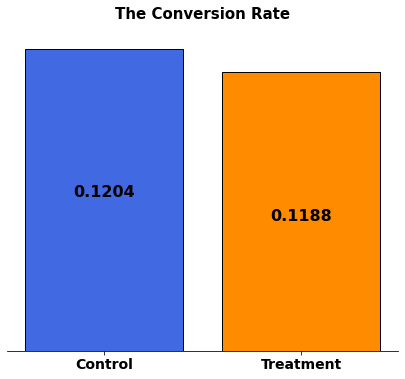

In [24]:
X = ['Control', 'Treatment']
Y = [control_con, treatment_con] # Conversion rates for both control and treatment after approximation


plt.figure(figsize=(7,6))
plt.bar(X, Y, edgecolor=["black", "black"] , color=['royalblue', 'darkorange'])

for i, g in enumerate(Y):
    plt.text(i, g - 0.01, "{0:.{digits}f}".format(g, digits=4), fontsize=16, fontweight="bold", ha="center")

plt.title("The Conversion Rate", fontsize=15, fontweight="bold" )
plt.ylim(0.10,0.122)
plt.xticks(fontsize=14, fontweight="bold")
plt.yticks([])
sns.despine(left=True);

**E.**Let's calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. We will need that later.  

In [25]:
obs_diff = treatment_con - control_con
obs_diff

-0.0015782389853555567

**F.** What is the probability that an individual received the new page?
### $p_{(new page)}$

In [26]:
p_new_page = (df2.loc[df['group']=='treatment'].landing_page == 'new_page').mean()
print('The probability that an individual received the new page is: {}'.format(p_new_page))

The probability that an individual received the new page is: 0.501596498713167


**G.** What is the probability that an individual received the old page?
### $p_{(old page)} $  $ or $  $ p_{(newpage')}$ 

In [27]:
p_old_page = 1- p_new_page
print('The probability that an individual received the new page is: {}'.format(p_old_page))

The probability that an individual received the new page is: 0.498403501286833


**H.** Let's display these proportions in a bar plot

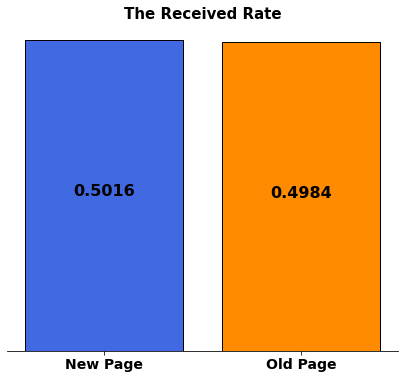

In [28]:
X = ['New Page', 'Old Page']
Y = [p_new_page, p_old_page] # Received rates for both control and treatment after approximation


plt.figure(figsize=(7,6))
plt.bar(X, Y, edgecolor=["black", "black"] , color=['royalblue', 'darkorange'])

for i, g in enumerate(Y):
    plt.text(i, g - 0.25, "{0:.{digits}f}".format(g, digits=4), fontsize=16, fontweight="bold", ha="center")

plt.title("The Received Rate", fontsize=15, fontweight="bold" )
plt.xticks(fontsize=14, fontweight="bold")
plt.yticks([])
sns.despine(left=True);

<br><br>
####  Based on these previous results, we find that:
- The difference between the conversion rate of the new page and the old page is almost zero, which we conclude from initially that there is no statistically significant evidence that the new page leads to an increase in the conversion rate, which we will confirm when we do the A / B tests.<br><br>

- it appears that the rate of the individual obtaining the new page and the old page is almost equal by about 50%, which indicates that there is no bias in one group about another in the data set, and therefore we can do the next tests without fear of lack of bias in the extracted results.<br><br>

========================================================================================================================

<br><br>
<a id='ab_test'></a>
## Part III - A/B Test

#### Since a timestamp is associated with each event, we could run a hypothesis test continuously as long as we observe the events. 

#### However, then the hard questions would be: 
- Do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do we run to render a decision that neither page is better than another?  

#### These questions are the difficult parts associated with A/B tests in general. But for now, let's keep in mind that we need to make the decision based only on all the data provided.

 

> **Hint**: Recall that we just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (**part II 'D.'**). 

#### So, if we want to make the basic assumption that the old page is still better than the new page, unless we prove that the new page is definitely better, and besides being able to commit a type 1 error rate "α" of 0.05 or 5%, it will be Our null hypothesis and alternative hypothesis (**$H_0$** and **$H_1$**), are as follows:  



**1. The Null Hypotheses: P_new - P_old <= 0:**
$$H_0: P_{new} - P_{old} \leq 0 $$

**2. The Alternative Hypotheses: P_new - P_old > 0:**
$$H_1: P_{new} - P_{old} > 0 $$ 


#### Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>


$$P_{new} = P_{old} = P_{population}$$


#### In this section, we will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



#### Let's first answer the following questions to provide the necessary parts for the simulation process:

**A.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [29]:
p_new = p
print('the convert rate for  P𝑛𝑒𝑤  under the null is: {}'.format(p_new))

the convert rate for  P𝑛𝑒𝑤  under the null is: 0.11959708724499628


**B.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [30]:
p_old = p
print('the convert rate for  P𝑜𝑙𝑑  under the null is: {}'.format(p_old))

the convert rate for  P𝑜𝑙𝑑  under the null is: 0.11959708724499628


&#9865; **Hint: This is because, as we said earlier in the null hypothesis, it assumes that the conversion rate for both the old page and the new page is equal to the conversion rate in general represented by the variable *p*, so the extracted result will be the same.** <br><br>

**C.** What is $n_{new}$, the number of individuals in the treatment group?

In [31]:
n_new = treatment_df.shape[0]
print('the 𝑛𝑛𝑒𝑤 is: {}'.format(n_new))

the 𝑛𝑛𝑒𝑤 is: 145310


**D.** What is $n_{old}$, the number of individuals in the control group?

In [32]:
n_old = control_df.shape[0]
print('the 𝑛𝑜𝑙𝑑 is: {}'.format(n_old))

the 𝑛𝑜𝑙𝑑 is: 145274


<br><br>
**E.** **Let us now simulate and bootstraping each of the control group and the treatment group using the random generation method `numpy.random.choice()`, and then make a sampling distribution for $(p{'}_{new}$ - $p{'}_{old})$ with a number of repetitions of 10,000 times using the iterative `for` loop.**<br><br>
> **Hint**: 1's and 0's in the `new_page_converted` or `old_page_converted` numpy array, And the size these $n_{new}$ or $n_{old}$.


In [33]:
# Sampling distribution 
p_diffs = []

for i in range(10000):
    sample_new_page = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new], replace= True)
    sample_old_page = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old], replace= True)
    p_diffs.append(sample_new_page.mean() - sample_old_page.mean())

<br> 

&#9865; **We will match these differences *p_diffs* to the sampling distribution using the 95% confidence interval by displaying them in the histogram**<br><br> 

**F.** Let's first convert the *p_diffs* variable into an array, and then create a 95% confidence interval.



In [34]:
p_diffs = np.array(p_diffs) # convert to numpy array

low, high = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

**G.** Now let's create and display the histogram to do the matching.

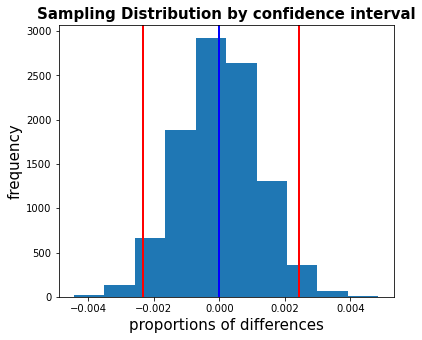

In [35]:
#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(p_diffs)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

&#9865; **Here, with a confidence rate of 95% and an error rate of only 5%, we find that the difference in observations lies between about -0.002 and 0.002, which is very close to zero, and therefore there is a very high probability that the difference in observations is under The null hypothesis, and this is what we will verify next.**<br><br> 

**H.** Simulating a distribution under the null hypothesis through a normal distribution.

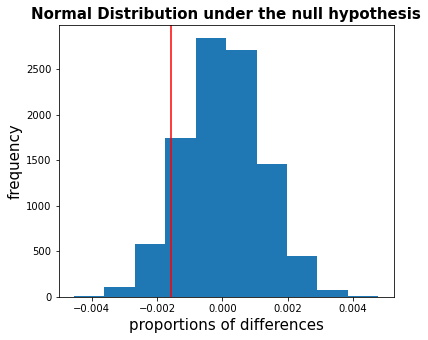

In [36]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, p_diffs.std(), p_diffs.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

&#9865; **Looking at the red vertical line, which expresses the place where our observed statistic is located, it is very close to the null value or the null hypothesis, and thus it is a confirmation that there is no significant difference in the observations of both pages.**<br><br> 

**I.** Let's be more certain by extracting the **p-value** by using the proportion of null sampling distribution represented by **null_vals** as greater than the observed difference represented by **obs_diff** in the `df2` data, as follows:

In [37]:
print("The p-value is: {}".format((null_vals > obs_diff).mean()))

The p-value is: 0.9067



&#9865; **Hint first:  We marked greater than '>' because the hypothesis we want to prove here is the alternative hypothesis, and our alternative hypothesis is** $(p{'}_{new}$ - $p{'}_{old} > 0)$

&#9865; **Since we depend on the error rate of the first type "α" by 0.05, and the extracted p-value is about 0.90, so it is several times greater than "α".**

&#9865; **The p-value quick rule says, if the p-value is less than "α", professional statisticians say we reject the null hypothesis $(H_0)$ , but if the p-value is greater than "α", we fail to reject the null hypothesis$(H_0)$**.

&#9865; **Based on the above, we fail to reject the null hypothesis$(H_0)$, which on the other hand means that there is no difference in the observations of both pages, and that the conversion rate of the new page is not really greater than the conversion rate of the old page.**


<br><br> 

**# We can also do the same previous simulation process using another method which is `random.binomial()`, since our hypothesis experiment is a binary experiment, we can use the random method `random.binomial()` to make simulations for both groups, where in this method we do not need to do a smoothing process and iterative simulation, because these iterations are already set Within the method itself, and therefore does not take much time in processing operations, as follows:**


In [38]:
sample_new=np.random.binomial(n_new,p_new,10000)/n_new
sample_old=np.random.binomial(n_old,p_old,10000)/n_old

diff_bi= sample_new - sample_old

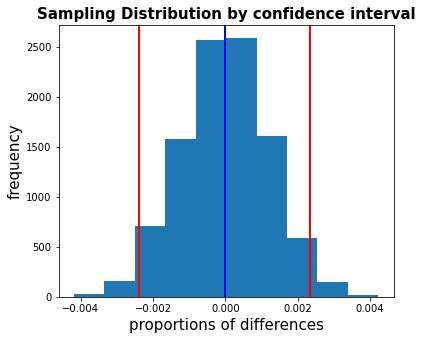

In [39]:
diff_bi = np.array(diff_bi) # convert to numpy array

low, high = np.percentile(diff_bi, 2.5), np.percentile(diff_bi, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diff_bi)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

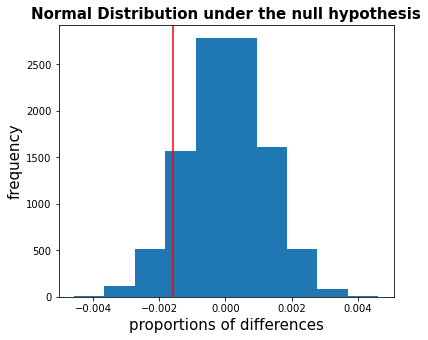

In [40]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diff_bi.std(), diff_bi.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [41]:
print("The p-value is: {}".format((null_vals > obs_diff).mean()))

The p-value is: 0.9049


&#9865; **We find that he is considered to have extracted and displayed the same results as the previous method.**<br><br> 

**# The matter does not stop at these methods only, there is also a third way to do the same simulation using the `sample()` method, it is more accurate and comprehensive in extracting the results because we are simulating and booting from a real sample in our data set, but it takes a lot of time in processing operations, as follows:**

In [42]:
diffs = []

for i in range(10000):
    b_sample = df2.sample(df2.shape[0], replace= True)
    sample_control= b_sample.loc[b_sample['group'] == "control"]
    samp_cont_con= (sample_control.converted == 1).mean()
    sample_treatment= b_sample.loc[b_sample['group'] == "treatment"]
    samp_treat_con= (sample_treatment.converted == 1).mean()
    diffs.append(samp_treat_con - samp_cont_con)

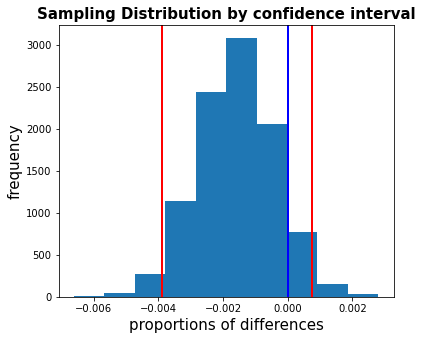

In [43]:
diffs = np.array(diffs) # convert to numpy array

low, high = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

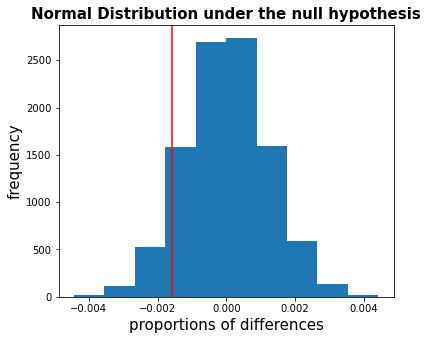

In [44]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs.std(), diffs.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [45]:
print("The p-value is: {}".format((null_vals > obs_diff).mean()))

The p-value is: 0.9088


&#9865; **We find that the extracted results are somewhat very close to the results of the two previous methods, we will only notice a slight difference in the results of the confidence interval and the p-value, this result is more accurate.**

<br><br>

**J. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [46]:
import statsmodels.api as sm;

# number of conversions with the old_page
convert_old = df2.loc[df2['group'] == "control"].loc[df2['converted'] == 1].shape[0]

# number of conversions with the new_page
convert_new = df2.loc[df2['group'] == "treatment"].loc[df2['converted'] == 1].shape[0]

convert_old , convert_new

(17489, 17264)

In [47]:
#Since we already have variables for both n_old and n_new, we don't need to create them again.
n_old , n_new

(145274, 145310)

<br><br>
### About the two-sample z-test
&#9865; **To do hypothesis testing in the traditional statistical method, we must have the values of both $Z_{score}$ and $Z_{\alpha}$, and since the hypothesis here is based on the difference in proportions, we then use the following equation to extract the value of $Z_{score}$, which is known in this case as (two-sample z-test), as follows:**


$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{(p{'})(1-p{'}) }{n_{new}} + \frac{(p{'})(1-p{'}) }{n_{old}}  } }
$$

where,
- $p{}$ is proportion for the "converted" success rate in the population.
- $p{'}$ is proportion for the "converted" success rate in the sample.

- ${ (p{'}_{new}-p{'}_{old})}$ The difference in the proportions of the "converted" success rate for the two groups in the population. 
- ${ (p{}_{new}-p{}_{old})}$ The difference in the proportions of the "converted" success rate for the two groups in the sample. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case).

<br><br>
&#9865; **${ (p{}_{new}-p{}_{old})}$ It's our null hypothesis, so its value will be '0'.**

&#9865; **In order to extract the value of ${p{'}_{new}}$, we must have the number of conversion of the new page represented by the variable *convert_new* , and then divide it by the number of individuals to whom this page has been shown, represented by the variable *n_new*, as follows:**

$$
{p{'}_{new}} = \frac{convert_{new}}{n_{new}}
$$

&#9865; **To extract the value of ${p{'}_{old}}$, do the same:**

$$
{p{'}_{old}} = \frac{convert_{old}}{n_{old}}
$$

&#9865; **To extract the value of ${p{'}}$, We do the following equation:**

$$
{p{'}} = \frac{convert_{new} + convert_{old}}{n_{new} + n_{old}}
$$

<br><br>
&#9865; **Now we can use statistical function `sm.stats.proportions_ztest()` To do the previous equation tasks to calculate our test statistic and p-value.**<br><br>
&#9865; **The syntax is:** 
```bash
proportions_ztest(count_array, nobs_array, value, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group.
- `nobs_array` = represents the total number of observations (rows) in each group.
- `value` = represents the value of the null hypothesis that we make.
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---

**K.** Now let's calculate the z_score and p_value

In [48]:
null_hypothesis = 0

z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], value= null_hypothesis, alternative='larger')
print("Z-Score: {}".format(z_score),"\nP-Value: {}".format(p_value))

Z-Score: -1.3109241984234394 
P-Value: 0.9050583127590245


&#9865; **Hint**: **Since the difference in the observations is (new - old) not (old - new), we must put both the `convert_new` and the `convert_old` of the `count_array` operator into a list in this order [convert_new,convert_old] not like that [convert_old,convert_new], and the same thing from the `n_new` and `the n_old`, in order to extract the correct values for us.**<br><br>

&#9865; **We see that the extracted p-value is the same as the p-values of the previous methods.**<br><br>


**L.** Now we need to extract the value of $Z_{\alpha}$, which is "α" by 0.05 but after converting it to a standardized value, through the `scipy` library as follows:

In [49]:
from scipy import stats

Za= stats.norm.ppf(1-0.05)
Za

1.6448536269514722

&#9865; **Hint: We subtracted the value of 1 from the value of "α" by 0.05, because the table for 'Z-test' depends on its results based on the left tailed test, and here our test is based on the right tailed.**<br><br>

&#9865; **The comparison between $Z_{score}$ and $Z_{\alpha}$ is made based on the following:**

- For a right-tailed test, reject null hypothesis if $Z_{score}$ > $Z_{\alpha}$.
- For a left-tailed test, reject null hypothesis if $Z_{score}$ < $Z_{\alpha}$.<br><br>

**M.** Now let's compare the two values using the following graph:

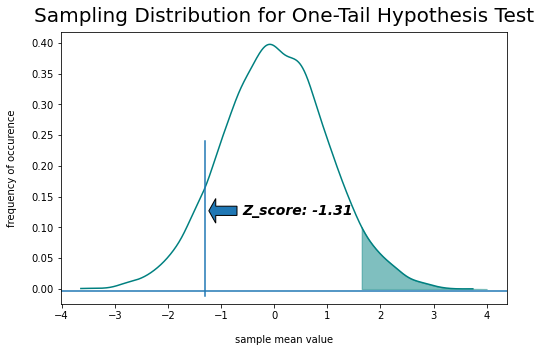

In [51]:
values = np.random.normal(loc=0, scale= 1, size=10000)

import scipy.stats as stats

plt.rcParams["figure.figsize"] = [8, 5]
two_std_from_mean = np.mean(values) + np.std(values)*Za
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 4, 300)
plt.fill_between(shade, kde(shade), alpha=0.50, color='teal')
plt.axhline(-0.004)
plt.axvline(z_score, ymin= 0.03, ymax= 0.6)
plt.text(-0.6, 0.12, "Z_score: {0:.{digits}f}".format(z_score, digits= 2), fontsize=14, fontweight="bold", fontstyle="italic")
plt.arrow(-0.7, 0.127, -0.4, 0, head_length= 0.13, head_width = -0.04, width = -0.015, ec="k")
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

&#9865; **From the graph, we find that the line for the $Z_{score}$ region is not within the shaded region of $Z_{\alpha}$ which is the rejection region, and it is far from it.**<br><br>
&#9865; **so we can say that we failed to reject the null hypothesis which says that there is no difference in the conversion rate for both pages, This is supported by previous methods.**

========================================================================================================================

<br><br>

<a id='regression'></a>
### Part IV - A regression approach


#### In this final part, we will see the follows:

- the result you achieved in the A/B test in Part II above can also be achieved by performing regression.
- A/B tests take an aggregate approach to the conclusions reached based on the data set, which aims to understand the parameters of the population (total population values).
- Instead, a machine learning technique such as regression takes a more individualistic and nuanced approach to drawing conclusions, aiming to predict the outcome of each point in a given data set.<br><br> 

&#9865; **Since our response variable is the `converted` variable, and it has two values for only two outcomes of either conversion as '1' or no conversion as '0', then it can be considered as a binary categorical variable.**<br><br>
&#9865; **so the most appropriate regression type to use would be "The logistic Regression".**<br><br>

**A.**First, a quick look back at the dataframe (df2)

In [52]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


<br><br>
&#9865; **The goal is to use `statsmodels` library to fit the regression model, to see if there is a significant difference in conversion based on the page the user receives.**<br><br>

&#9865; **The response variable and its results depend on the expectation variable represented by the page that the user receives, which in our case here is the `group` variable or `landing_page` variable, so we can choose any of them because the two are related to each other.**

 
**B.** We will choose the `group` variable, but since it is a categorical variable, it must have a dummy variable for its values to become numerical, as follows:

In [53]:
df2[['control', 'treatment']]= pd.get_dummies(df2['group'])

df2.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**B.** Now let's drop any of the dummy variables, and rename the remaining variable as `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`. 

In [54]:
df2.drop('control', axis= 1, inplace= True)
df2.rename(columns={'treatment': 'ab_page'}, inplace= True)

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


**C.** Let's use **statsmodels** to instantiate your regression model on the two columns you created in part (A). above, With the creation of a column for another variable of the `intercept` and assigning it the values '1' for the entire column, then fit the model to predict whether or not an individual converts. 


In [55]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**D.** Let us now present a summary of the results of the previous model, in order to try to extract answers from them to our questions posed.

In [56]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-08-01 13:27 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

<br><br>
&#9865; **We note that the p-value of the coefficient `ab_page` is 0.1899, which is very different from the p-value extracted from the hypothesis tests of the previous methods, which was about 0.9050.**<br><br>

&#9865; **This is due to the fact that logistic regression depends on hypothesis on the occurrence of the thing or the non-occurrence of the thing, in other words, it is equal to or not equal to:**<br><br>
$$H_0: P_{new} - P_{old} = 0 $$
$$H_1: P_{new} - P_{old}\neq 0 $$
<br><br>
&#9865; **As for the previous hypotheses tests, they depended on less than or equal to and greater than:**<br><br>
$$H_0: P_{new} - P_{old} \leq 0 $$
$$H_1: P_{new} - P_{old} > 0 $$ 
<br><br>
&#9865; **Since the alternative hypothesis of the logistic regression is $(\neq)$, it represents the two-tail test, which differs from the alternative hypothesis when testing the previous hypotheses is (>), and it represents the right-tail test, so the results of the probabilities are different.**
<br><br>
&#9865; **Since the p-value of the logistic regression is 0.1899, it is still smaller than "α", which means that we have no evidence of a difference in the conversion rates of the two pages, and on the other hand, we will not make an interpretation of the value of the coefficient of `ab_page` because it is not significant Statistic.**
<br><br>
<br><br>
#### #Now we can also think about other things that may affect the conversion of the individual or not, as we can think about the following:

- Most of the time the timestamp is a variable or an important factor that may affect individual converts, and this is in the case if its durations are large for several months or years, but we find that the timestamp we have here in the dataset does not exceed a month, so we think that it will not have Effect on the conversion of individuals.

- We can add features from other external factors represented by new variables to the multiple regression model, to detect and verify the following:

>- Check the coefficients between these new factors and the conversion rate.
>- Check the coefficients between these new factors and other independent variables.
>- Find out whether these new factors are statistically significant predicting an individual's conversion rate or not.

- However, here are some defects or problems that we can encounter if these factors are not related, and they are the following:

>- It makes the interpretation of coefficients more complex.
>- The multiple linear relationship can give rise to an VIFS, which must then be checked to see which of these factors are less useful to remove from the model.
>- The new factors contain outliers, which may damage the entire model.
<br><br>
<br><br>

&#9865; **Now, along with testing whether the conversion rate changes based on different pages, we'll add other new external factors of `countries`, to see how an individual's conversion rate affects based on the country they life in.**
<br><br>
**E.**Let's first do a reading of the `countries` dataset.

In [57]:
country_df = pd.read_csv('countries.csv')

country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


**F.** Let's merge the `country_df` dataset with the `df2` dataset, using method `join()`.

In [58]:
country_df= country_df.join(df2.set_index('user_id'), on= 'user_id', how= 'inner')

country_df.head()

,user_id,country,timestamp,group,landing_page,converted,ab_page,intercept
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


**G.** Since the `country` column is a categorical variable containing three classes `['US','UK','CA']`, we will create dummy variables for these classes, and then drop one of them and use the remaining two dummy variables, as follows:

In [59]:
type_dummies = pd.get_dummies(country_df['country'])
country_df = country_df.join(type_dummies)

country_df.head()

,user_id,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


**H.** Let's extract the generally conversion rate based on each country.

In [61]:
country_df.groupby("country")[["converted"]].mean()["converted"].nlargest()

country
UK    0.120594
US    0.119547
CA    0.115318
Name: converted, dtype: float64

&#9865; **We see that the conversion rate of individuals in general based on each country is very close to each other and almost equal, which predicts in advance that the country factor has no effect on the conversion rate of individuals, which we will confirm through the following summary of the model.**

In [62]:
log_mod = sm.Logit(country_df['converted'], country_df[['intercept', 'ab_page', 'UK', 'US' ]])
results = log_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-08-01 14:51 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

&#9865; **Here we see that the LLR p-value value is 0.17599, which is greater than the "α", which indicates that the model in general is not statistically significant, which was confirmed when looking at the results of the p-values of the three coefficients that they are indeed all greater than 0.05, and that each of the coefficients UK and US do not have an increase effect on an individual's conversion rate.**
<br><br>
&#9865; **On the other hand, if we look at the values of the US and UK coefficients, we find that the difference between them is very slight, but it is still considered a difference, which calls for adding the so-called interaction process between the page and the country to the logistic regression, to find out whether it will result in a change in conversion or not.**
<br><br>
**I.**Let's first create dummy variables for the interaction, by multiplying each of the `US` and `UK`  on the `ab_page`, as follows:

In [63]:
country_df['US_page'] = country_df['US'] * country_df['ab_page']
country_df['UK_page'] = country_df['UK'] * country_df['ab_page']

country_df.head()

,user_id,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,US_page,UK_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


**J.** Now let's create and display the form summary after adding these new interactions.

In [64]:
log_mod = sm.Logit(country_df['converted'], country_df[['intercept', 'ab_page', 'UK', 'US', 'US_page', 'UK_page']])
results = log_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-08-01 15:09 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

&#9865; **Here we see that the LLR p-value value is 0.19199, which is greater than the "α", which indicates that the model in general is not statistically significant, Even after adding the `US_page` and `UK_page` interaction parameters, they did not change anything in the results.**
<br><br>
**K.** Let's take things further, and see if there is an 'VIFS' there that can affect the results process, using the `statsmodels` and `pasty` libraries as follows:

In [65]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, x = dmatrices("converted ~ ab_page + UK + US + US_page + UK_page", country_df, return_type="dataframe")
vif = pd.DataFrame()
vif["vector_1"] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["futears_1"] = x.columns
vif

,vector_1,futears_1
0,40.370103,Intercept
1,20.042669,ab_page
2,9.052871,UK
3,9.065123,US
4,19.555056,US_page
5,10.469097,UK_page


&#9865; **We find that we already have three coefficients containing VIFS greater than 10 and they are `[ab_page,US_page,UK_page]`, then the coefficient with the largest inflation value and at the same time the least useful must be eliminated.**
<br><br>
&#9865; **Since the coefficient `ab_page` is the basis and most important for our results, we cannot delete it, and therefore we will have only the two coefficients`[US_page,UK_page]`, we will delete the largest coefficient of them, which is `US_page`.**
<br><br>
**L.** Let's check again VIFS after removing the `US_page`.

In [66]:
y2, x2 = dmatrices("converted ~ ab_page + UK + US + UK_page", country_df, return_type="dataframe")
vif2 = pd.DataFrame()
vif2["vector_1"] =  [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif2["futears_1"] = x2.columns
vif2

,vector_1,futears_1
0,21.392892,Intercept
1,1.332239,ab_page
2,5.500529,UK
3,4.502226,US
4,2.325243,UK_page


&#9865; **We find that we no longer have any coefficients that have an inflation factor.**
<br><br>
**M.** Now let's make a sample summary of these new coefficients, to see if there will be a change in the results or not?

In [67]:
log_mod2 = sm.Logit(country_df['converted'], country_df[['intercept', 'ab_page', 'UK', 'US', 'UK_page']])
results2 = log_mod2.fit()

results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.4204
Date:               2022-08-01 15:32 BIC:              212834.3187
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.15568    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0257    0.0268  -75.5180  0.0000  -2.0783  -1.9731
ab_page       -0.0236    0.0132   -1.7853  0.0742  -0.0495   0.0023
UK             0.0335    0.0313    1.0697  0.2848  -0.0279   0.0948
US             0.0407    0.0269    1.5151  0.1298  -0.0120   0.0934
UK_page        0.0344    0.0264    1.3057  0.1917  -0.0172   0.0861
==================================================================

"""

&#9865; **Here we see that the LLR p-value value is 0.15568, which indicates that the model in general is not statistically significant, This is also confirmed by looking at the p-values of the four coefficients, even after the inflation factor is taken into account from them.**

&#9865; **Therefore, we find that there is no statistical evidence that countries have an effect on the conversion of individuals, and we also make an explanation for each of the four coefficients values, which are log odds values and converting them to odds ratio, it will have no benefit, because the probabilistic values are not statistical significance, so we will not do this step.**

=======================================================================================================================

<br><br>
<a id='Concl'></a>
## Conclusions

#### A. Descriptive Statistics Conclutions:

- The conversion rate of an individual regardless of the page they receive is "0.119".
- The conversion rate of an individual to the new page is "0.118".
- The conversion rate of an individual to the old page is "0.120".
- The rate receiving of an individual to the new page is "0.5016".
- The rate receiving of an individual to the old page is "0.498".
- The difference observed in the conversion rate between the two pages is "-0.001".



#### B. A/B Test Conclutions:

- When we performed A/B tests using professional methods, we found with a "95%" confidence interval that the difference in observations was between about "-0.002" and "0.002", and that the p-value was "0.90" which is greater than "α" which is "0.05", which It indicates that we failed to reject the null hypothesis, and that we have statistical evidence that there is no difference in the conversion rate for both pages.
<br><br>
- When  we performed A/B tests using the traditional statistical methods, we extracted the same results as the previous results for the p-value, and that the value of $Z_{score}$ was "-1.31" which is less than the value of $Z_{\alpha}$ which was "1.644", which also indicates that we failed to reject the null hypothesis.


#### C. Logistic Regression Analysis Conclutions:

- When we used pages only for the regression, we found that the p values were 0.189, which indicates that the model is not statistically significant, and that there is no evidence of a difference in the conversion observations.
<br><br>
- We found that adding other factors like timestamp won't make any difference to the model, because it's less than a month old only.
<br><br>
- When we add other external factors such as countries to see how much they affect the individual conversion rate, we find after removing the inflation factor that the p-values of each country are also not statistically significant, and that there is no evidence that countries have an effect on the conversion rate.
<br><br>
<br><br>

&#9865; **Based on all the previously mentioned tests, and that we failed to reject the null hypothesis, and that there is not enough evidence that the conversion rate of the new page is higher than the old page, we see that we should continue to keep the old page and doing the experiment for a longer time, But with the following things in mind:**

- Novelty effect and aversion to change when existing users are first exposed to change.
- There must be enough traffic and conversions to get meaningful and repeatable results.
- Run the process longer enough for the experiment to take into account changes in behavior based on the time of day, week, or seasonal events.
- Practical significance of conversion rate versus statistical significance, eg (cost of launching a new feature versus profit from the increase in conversion).

<br><br>
<br><br>









